## Categorical variables

In [124]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 400)
import matplotlib.pyplot as plt
import seaborn as sns

In [125]:
df=pd.read_csv("data.csv")
df.shape

(10, 4)

In [128]:
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [126]:
df.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [127]:
df.dtypes

Country       object
Age          float64
Salary       float64
Purchased     object
dtype: object

In [64]:
df['Country'].value_counts()

France     4
Germany    3
Spain      3
Name: Country, dtype: int64

In [65]:
pd.get_dummies(df['Country']) #this is ONE HOT ENCODING

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,1,0
5,1,0,0
6,0,0,1
7,1,0,0
8,0,1,0
9,1,0,0


In [68]:
pd.get_dummies(df['Country'],drop_first=True,prefix='Country') #this is Dummy variables

,Country_Germany,Country_Spain
0,0,0
1,0,1
2,1,0
3,0,1
4,1,0
5,0,0
6,0,1
7,0,0
8,1,0
9,0,0


In [69]:
#Lets add the ONe-Hot Encoded variables into the data
df_new=pd.concat([df,pd.get_dummies(df['Country'],prefix='Country')],axis=1)

In [70]:
df_new.head()

,Country,Age,Salary,Purchased,Country_France,Country_Germany,Country_Spain
0,France,44.0,72000.0,No,1,0,0
1,Spain,27.0,48000.0,Yes,0,0,1
2,Germany,30.0,54000.0,No,0,1,0
3,Spain,38.0,61000.0,No,0,0,1
4,Germany,40.0,NaN,Yes,0,1,0


In [76]:
train=pd.read_csv('train.csv',nrows=10000,usecols=['id','ps_ind_02_cat','ps_car_11_cat','ps_ind_01','target'])

In [77]:
train.shape

(10000, 5)

In [79]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_car_11_cat
0,7,0,2,2,12
1,9,0,1,1,19
2,13,0,5,4,60
3,16,0,0,1,104
4,17,0,0,2,82


In [80]:
train['ps_ind_02_cat'].value_counts()

 1    7267
 2    2091
 3     459
 4     182
-1       1
Name: ps_ind_02_cat, dtype: int64

In [131]:
train['ps_car_11_cat'].value_counts()

104    1420
103     386
64      374
87      291
28      242
32      220
99      207
82      194
5       191
65      186
83      165
10      161
38      157
39      144
60      138
101     133
22      130
68      126
67      126
12      122
78      122
16      117
70      113
11      112
80      109
27      108
85      108
92      102
48       97
84       95
51       93
74       93
89       91
44       91
19       90
7        89
25       88
40       85
46       84
49       84
34       84
90       82
31       81
37       77
53       77
29       75
88       73
55       71
17       71
42       70
94       68
43       67
100      66
26       63
57       62
13       60
52       59
95       59
1        54
41       53
86       53
61       52
36       52
3        51
62       50
102      48
72       48
76       47
66       46
2        45
71       45
20       44
98       42
93       41
77       40
14       40
9        39
24       39
6        37
30       37
50       36
8        36
96       35
91  

Text(0.5,1,'Proportion of Different categories in the DATA')

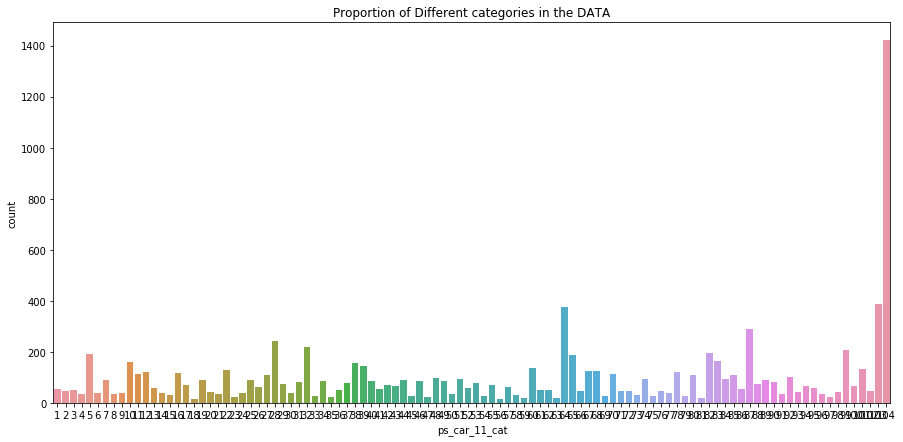

In [130]:
plt.subplots(figsize=(15,7))
sns.countplot(x='ps_car_11_cat',data=train);
plt.title("Proportion of Different categories in the DATA")

<Figure size 432x288 with 0 Axes>

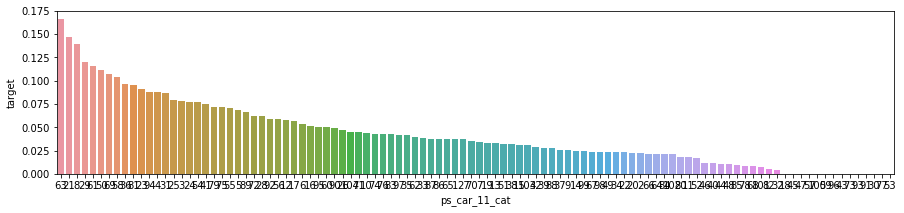

In [104]:
plt.figure()
fig, ax = plt.subplots(figsize=(15,3))
cat_perc = train[['ps_car_11_cat', 'target']].groupby(['ps_car_11_cat'],as_index=False).mean()
cat_perc.sort_values(by='target', ascending=False, inplace=True)
sns.barplot(ax=ax, x='ps_car_11_cat', y='target', data=cat_perc, order=cat_perc['ps_car_11_cat']);

### Target Encoding

In [ ]:
# This handles missing values as just another value and computes the encoding like it does for any other value of the variables.
# For values that are new in the test it take the probability as 0

In [105]:
cat_perc.head()

,ps_car_11_cat,target
62,63,0.166667
20,21,0.147059
7,8,0.138889
28,29,0.120000
60,61,0.115385


In [ ]:
#In case of Regression, we would have taken the AVG of the target variable instead of Probabaility

### Frequency Encoding

In [106]:
train['ps_car_11_cat'].value_counts().head()

104    1420
103     386
64      374
87      291
28      242
Name: ps_car_11_cat, dtype: int64

### Binary Encoding

In [134]:
global_max=max(train['ps_car_11_cat'])
max_bin_len = len("{0:b}".format(global_max)) #bin(global_max) is the equivalent binary number

In [112]:
max_bin_len

7

In [118]:
train['BE']=train['ps_car_11_cat'].apply(lambda x: "{0:b}".format(x).zfill(max_bin_len))
train['BE'].head()

0    0001100
1    0010011
2    0111100
3    1101000
4    1010010
Name: BE, dtype: object

In [121]:
splitted_tr=train['BE'].apply(lambda x: pd.Series(list(x)).astype(np.uint8))
splitted_tr.columns = ['ps_car_11_cat'+'BE' + '_bin_' + str(x) for x in splitted_tr.columns]

In [122]:
train=train.join(splitted_tr)

In [123]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_car_11_cat,BE,ps_car_11_catBE_bin_0,ps_car_11_catBE_bin_1,ps_car_11_catBE_bin_2,ps_car_11_catBE_bin_3,ps_car_11_catBE_bin_4,ps_car_11_catBE_bin_5,ps_car_11_catBE_bin_6
0,7,0,2,2,12,0001100,0,0,0,1,1,0,0
1,9,0,1,1,19,0010011,0,0,1,0,0,1,1
2,13,0,5,4,60,0111100,0,1,1,1,1,0,0
3,16,0,0,1,104,1101000,1,1,0,1,0,0,0
4,17,0,0,2,82,1010010,1,0,1,0,0,1,0


In [ ]:
#more here 
#http://www.willmcginnis.com/2015/11/29/beyond-one-hot-an-exploration-of-categorical-variables/
